**Introduction**

**Reddit flair detector**

This is a detector that detects the flair of a reddit post specifically the posts under the subreddit 'india'. There are many flairs in reddit india but I trained the model to identify 9 flairs i.e politics, non-political, askindia, science/technology, policy/economy, business/finance, sports, scheduled and coronavirus. The neural network is an implementation of bidirectional lstm. I used dropouts to reduce over fitting. The code is completely written in Python and different libraries of Python are used. The layers of RNN(LSTM) is defined using a deep learning library Keras built upon Tensorflow. Libraries like Numpy, Pandas, Matplotlib are used to work with the data.

Have a look through the notebook to understand the code. Each part of the code is well defined for your understanding.

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Google drive is mounted to access the training and test images and to upload the results as a submission.csv file

**Scraping Reddit data**



In [2]:
!pip install praw
!pip install --upgrade praw

#importing necessary packages
import praw
import pandas as pd
import datetime as dt

     |████████████████████████████████| 153kB 3.4MB/s 
     |████████████████████████████████| 204kB 10.4MB/s 
Requirement already up-to-date: praw in /usr/local/lib/python3.6/dist-packages (7.1.0)


I am using praw to scrap the data from reddit. Pandas is used to read and upload the data in a csv file.

In [3]:
# logging into reddit 
reddit = praw.Reddit(client_id='', 
                     client_secret='', 
                     user_agent='', 
                     username='', 
                     password='')

#printing username for verification
#print(reddit.user.me())

I logged into the Reddit app I created to scrap data from Reddit. Password field is left empty due to confidentiality issues.

In [ ]:
#variable to access posts of subreddit india
subreddit = reddit.subreddit('india')

# a dictionary of flairs to be scrapped
flair_dict={0:'Politics',1:'Non-political',2:'AskIndia',3:'Science/Technology',
            4:'Policy/Economy',5:'Business/Finance',6:'Scheduled',7:'Sports' ,8:'Coronavirus'}

print(flair_dict)

#information of each post to be scrapped
topics_dict = { "title":[],"score":[],"id":[],"url":[],"comms_num": [],"created": [],"body":[],"flair":[]}

{0: 'Politics', 1: 'Non-political', 2: 'AskIndia', 3: 'Science/Technology', 4: 'Policy/Economy', 5: 'Business/Finance', 6: 'Scheduled', 7: 'Sports', 8: 'Coronavirus'}


I created a variable subreddit which will help us access the posts under r/india. Then I created a dictionary of flairs to be detected and a list of topics to be scrapped under each topic like title, id, url, body, flair etc.

In [ ]:
#scrapping the data for each flair
for flair in flair_dict:
    for submission in subreddit.search(flair_dict[flair],limit=1000):
          topics_dict["title"].append(submission.title)
          topics_dict["score"].append(submission.score)
          topics_dict["id"].append(submission.id)
          topics_dict["url"].append(submission.url)
          topics_dict["comms_num"].append(submission.num_comments)
          topics_dict["created"].append(submission.created)
          topics_dict["body"].append(submission.selftext)
          topics_dict["flair"].append(flair)

data = pd.DataFrame(topics_dict)

# storing the scrapped data
data.to_csv('', index = False) 

Now under each flair, I scrapped certain amount of posts and stored the scarpped data in train.csv file.

In [ ]:
#displays the info about the data stored
data.info()

# a list to count no of posts scrapped from each flair
flair_count=[0,0,0,0,0,0,0,0,0]

#iterating through all the posts to find its flair 
for flair in data['flair']:
  flair_count[flair] += 1

#printing the no of posts scrapped under each flair
print(flair_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4124 entries, 0 to 4123
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      4124 non-null   object 
 1   score      4124 non-null   int64  
 2   id         4124 non-null   object 
 3   url        4124 non-null   object 
 4   comms_num  4124 non-null   int64  
 5   created    4124 non-null   float64
 6   body       4124 non-null   object 
 7   flair      4124 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 257.9+ KB
[494, 424, 452, 440, 436, 466, 466, 460, 486]


About 4124 posts are scrapped in total and you can run this block to find the number of posts scrapped under each each flair. I ran a for loop to iterate through all the posts

In [ ]:
# creating an empty list to add training data, val data and their respective labels
train_sentences = []
train_labels = []
val_sentences = []
val_labels = []

# defining the size of data to be trained
total_size = len(data)
train_portion = 0.9

print(total_size)

# iterating through the data to the sentences and labels in the mentioned ratio for each flair
for flair in flair_dict:
  
  sentences = []
  labels = []
  
  for index in data.index:
    
    if data['flair'][index] == flair:
      sen = str(data['title'][index]) + ' ' + str(data['body'][index])
      sentences.append(sen.lower())
      labels.append(data['flair'][index])
  
  flair_size = flair_count[flair]
  split = int(train_portion * flair_size)

  flair_train_sentences = sentences[0:split]
  flair_val_sentences = sentences[split:flair_size]
  flair_train_labels = labels[0:split]
  flair_val_labels = labels[split:flair_size]

  print(len(flair_train_labels))
  print(len(flair_val_labels))
  
  train_sentences += flair_train_sentences
  val_sentences += flair_val_sentences
  train_labels += flair_train_labels
  val_labels += flair_val_labels

print(train_sentences[0])
print(len(train_labels))
print(len(val_labels))

4124
444
50
381
43
406
46
396
44
392
44
419
47
419
47
414
46
437
49
mixing religion with politics is suicidal 
3708
416


Now I am defining the portion of training directory that will be used for training and the rest will be used for validation. Here I used 90% of images for training and the rest for validation. Then I appended training sentences, validation sentences and their respective labels for each category. The title and the body of each post is considered as a single sentence.

In [ ]:
# most common words to be eliminated
stopwords = ['india','com','https','not','will','www','can','http','indian','in','people','like','the','one','also','no','now','r','just','i', "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

# to eliminate all the unnecessary words to improve the efficiency of training
for index in range(len(train_sentences)):
  for word in stopwords:
    token = " " + word + " "
    train_sentences[index] = train_sentences[index].replace(token, " ")
    train_sentences[index] = train_sentences[index].replace("  ", " ")

print(train_sentences[0])

mixing religion politics suicidal 


I listed the most common words that don't affect the training and replaced all those words with a space.

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Imported tensorflow to build and train the model using neural networks. Imported Numpy to manipulate the data. Imported other important functions from Keras which is explained below.

In [ ]:
#tokenizing the sentences
tokenizer = Tokenizer(num_words = 25000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_sentences)

word_index = tokenizer.word_index
vocab_size = len(word_index)

# listing out the words, their index and number of words in the training sentences
print(word_index)
print(vocab_size)

#replacing the words with corresponding index and converting it into a list of vectors in a matrix
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=120, padding='post', truncating='post')

#performing the same function on validation sentences
val_sequences = tokenizer.texts_to_sequences(val_sentences)
val_padded = pad_sequences(val_sequences, maxlen=120, padding='post', truncating='post')

print(train_padded)

{'<OOV>': 1, 'com': 2, 'https': 3, 'india': 4, 'www': 5, 'in': 6, 'http': 7, 'the': 8, '1': 9, 'government': 10, 'news': 11, '2': 12, 'even': 13, 'time': 14, 'it': 15, 'get': 16, 'i': 17, '3': 18, 'to': 19, 'us': 20, 'business': 21, 'know': 22, 'years': 23, 'political': 24, 'new': 25, 'economy': 26, '5': 27, 'data': 28, 'make': 29, 'week': 30, 'r': 31, 'world': 32, 'state': 33, 'money': 34, 'this': 35, 'good': 36, 'year': 37, 'many': 38, 'country': 39, "don't": 40, 'need': 41, 'much': 42, 'policy': 43, 'a': 44, 'work': 45, '4': 46, 'well': 47, 'since': 48, 'first': 49, 'last': 50, 'of': 51, 'back': 52, 'and': 53, 'may': 54, 'non': 55, 'education': 56, 'post': 57, 'modi': 58, 'go': 59, 'day': 60, 'help': 61, 'html': 62, 'now': 63, 'made': 64, 'take': 65, 'national': 66, 'reddit': 67, 'finance': 68, 'technology': 69, 'politics': 70, 'want': 71, 'two': 72, '2020': 73, 'indiatimes': 74, 'every': 75, '6': 76, 'on': 77, 'use': 78, 'way': 79, 'economic': 80, 'for': 81, 'x200b': 82, 'companies

I used tokenizer function to represent the words used in training sentences as numbers. Then I used texts_to_sequences to convert the sentences into sequences of numbers where the numbers represent the index of words determined by tokenizer. pad_sequences is used to represent all sequences in a single 2-D array. The maximum number of words(index) in a single sequence is limited to 120. '<OOV>' token is used in tokenizer to represent unknown words during testing as 1 by default.

In [ ]:
#defining the layers of neural network
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(25000, 64, input_length=120),
    # first bidirectional lstm layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    # second bidirectional lstm layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, kernel_regularizer='l1', activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, kernel_regularizer='l1', activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 64)           1600000   
_________________________________________________________________
bidirectional (Bidirectional (None, 120, 256)          197632    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 1

I used Keras library to built the layers of my neural networks because of the high level abstraction it provides. I set the embedding dimension as 64. I used 2 bidirectional RNN layers and 3 fully defined layers to complete my neural network. I used dropout to improve the accuracy. I used softmax function as the activation function in the last layer because we are building a multi class classifier. The loss function and optimizer I used are sparse categorical crossentropy and rms prop. I didn't set the learning rate to any particular value because my training was already slow due to multiple convolutions.

In [ ]:
# converting training and validation data into numpy arrays
training_padded = np.array(train_padded)
training_labels = np.array(train_labels)
validation_padded = np.array(val_padded)
validation_labels = np.array(val_labels)

print(training_labels)

#training the model
history = model.fit(training_padded, training_labels, epochs=25, validation_data=(validation_padded, validation_labels),steps_per_epoch=20)

[0 0 0 ... 8 8 8]
Epoch 1/25
20/20 [==============================] - 35s 2s/step - loss: 6.3172 - accuracy: 0.1580 - val_loss: 5.7616 - val_accuracy: 0.1562
Epoch 2/25
20/20 [==============================] - 33s 2s/step - loss: 5.3175 - accuracy: 0.2300 - val_loss: 4.8872 - val_accuracy: 0.2909
Epoch 3/25
20/20 [==============================] - 34s 2s/step - loss: 4.4705 - accuracy: 0.3398 - val_loss: 4.1429 - val_accuracy: 0.3365
Epoch 4/25
20/20 [==============================] - 34s 2s/step - loss: 3.7073 - accuracy: 0.4593 - val_loss: 3.4734 - val_accuracy: 0.4663
Epoch 5/25
20/20 [==============================] - 33s 2s/step - loss: 3.1447 - accuracy: 0.5440 - val_loss: 3.0048 - val_accuracy: 0.5264
Epoch 6/25
20/20 [==============================] - 34s 2s/step - loss: 2.6681 - accuracy: 0.6119 - val_loss: 2.5705 - val_accuracy: 0.5841
Epoch 7/25
20/20 [==============================] - 33s 2s/step - loss: 2.2744 - accuracy: 0.7087 - val_loss: 2.3863 - val_accuracy: 0.6442
Ep

I converted all the padded sequences and labels into numpy arrays so that it is trainable. The model is trained for 30 epochs. I used validation data to check the model's performance on unseen data.

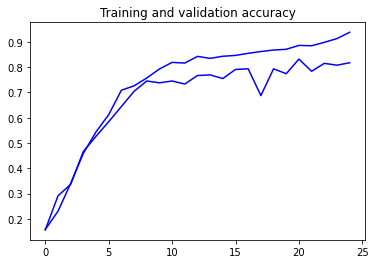

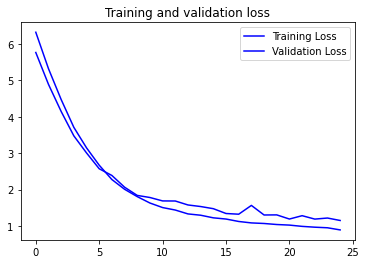

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#plotting graph for training and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

#plotting graph for training and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

 I have plotted the progress of training on a graph using matplotlib. I got training accuracy around 96% and validation accuracy around 50%.

In [ ]:
#opening submission file
pred_data = pd.read_csv("")
pred_data.info()

test_sentences = []
url=[]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     1406 non-null   object
 1   flair   1406 non-null   object
dtypes: object(2)
memory usage: 22.1+ KB


Now I opened the submission file to predict the flair of each post.

In [ ]:
#iterating through each post and scraping the title of the post to 
for index in pred_data.index:
  submission = reddit.submission(url=pred_data['url'][index])
  print(index)
  url.append(pred_data['url'][index])
  test_sentences.append(submission.title)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

I iterated through each post of the submission file and appended the titles into a list

In [ ]:
print(len(url))
print(len(test_sentences))

#to remove unnecessary words in test sentences
for index in range(len(test_sentences)):
  for word in stopwords:
    token = " " + word + " "
    test_sentences[index] = test_sentences[index].replace(token, " ")
    test_sentences[index] = test_sentences[index].replace("  ", " ")

1406
1406


I removed the unnecessary words that don't affect the training with a space.

In [ ]:
print(test_sentences[0])
print(len(test_sentences))

#representing test sentences as a sequence
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=120, padding='post', truncating='post')

#predicting the matrix of sequences
predictions  = model.predict(test_padded)
flair_list=[]
pred_count=[0,0,0,0,0,0,0,0,0]
print(len(predictions))

# iterating through prediction of each sequence o obtain the flair
for prediction in predictions:
  flair_list.append(flair_dict[np.argmax(prediction)])
  pred_count[np.argmax(prediction)]+=1

print(flair_list)

Need feedback Insurance Policy I took. (x-post AskIndia)
1406
1406
['AskIndia', 'Science/Technology', 'AskIndia', 'Business/Finance', 'AskIndia', 'Policy/Economy', 'Science/Technology', 'Policy/Economy', 'Policy/Economy', 'Business/Finance', 'AskIndia', 'Business/Finance', 'Scheduled', 'Science/Technology', 'AskIndia', 'AskIndia', 'AskIndia', 'AskIndia', 'Business/Finance', 'Scheduled', 'AskIndia', 'Business/Finance', 'Business/Finance', 'AskIndia', 'Policy/Economy', 'AskIndia', 'AskIndia', 'Policy/Economy', 'Business/Finance', 'Business/Finance', 'AskIndia', 'Science/Technology', 'Policy/Economy', 'Policy/Economy', 'AskIndia', 'AskIndia', 'Policy/Economy', 'AskIndia', 'Policy/Economy', 'AskIndia', 'Business/Finance', 'Policy/Economy', 'Policy/Economy', 'Business/Finance', 'AskIndia', 'AskIndia', 'AskIndia', 'AskIndia', 'Scheduled', 'AskIndia', 'AskIndia', 'AskIndia', 'AskIndia', 'Business/Finance', 'AskIndia', 'AskIndia', 'AskIndia', 'Policy/Economy', 'AskIndia', 'AskIndia', 'Business

I represented the test sentences as a sequence of words using the tokenizer that i trained on training sentences and represented the test sequences as a 2-D matrix. Then, I predicted the sequence matrix and obtained the prediction of each sentence by traversing through each row of the prediction.

In [ ]:
print(pred_count)

[137, 69, 82, 368, 145, 78, 368, 122, 37]


I printed the number of images belonging to each category.

Politics: 137

Non-political: 69

Askindia: 82

Science/technology: 368

Policy/Economy: 145

Business/Finance: 78

Scheduled: 368

Sports: 122

Coronavirus: 37 



In [ ]:
dict = {'url': url, 'flair': flair_list}  
df = pd.DataFrame(dict) 
df.to_csv('', index = False)

I have uploaded the results in the submission file using pandas.